## Homework 3

You will have to submit the following two completed ipython notebooks for this homework.

1. PCA_analysis
2. Reconstruction

In [2]:
%pylab inline
data_dir = "../../Data/Weather"

Populating the interactive namespace from numpy and matplotlib


### Downloading Pickled data from S3
If `STAT.pickle` is not in the directory, get it using the following command

In [24]:
!curl -o $data_dir/STAT.pickle http://mas-dse-open.s3.amazonaws.com/Weather/STAT.pickle

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 77.8M  100 77.8M    0     0  10.6M      0  0:00:07  0:00:07 --:--:-- 11.3M


### Get the statistics from the Pickle File

In [3]:
import pickle
STAT,STAT_description=pickle.load(open(data_dir+'/STAT.pickle','r'))

In [4]:
STAT.keys()

['TMIN', 'TOBS', 'TMAX', 'SNOW', 'SNWD', 'PRCP']

In [5]:
STAT_description

[('SortedVals',
  'Sample of values',
  'vector whose length varies between measurements'),
 ('UnDef',
  'sample of number of undefs per row',
  'vector whose length varies between measurements'),
 ('mean', 'mean value', ()),
 ('std', 'std', ()),
 ('low100', 'bottom 1%', ()),
 ('high100', 'top 1%', ()),
 ('low1000', 'bottom 0.1%', ()),
 ('high1000', 'top 0.1%', ()),
 ('E', 'Sum of values per day', (365,)),
 ('NE', 'count of values per day', (365,)),
 ('Mean', 'E/NE', (365,)),
 ('O', 'Sum of outer products', (365, 365)),
 ('NO', 'counts for outer products', (365, 365)),
 ('Cov', 'O/NO', (365, 365)),
 ('Var', 'The variance per day = diagonal of Cov', (365,)),
 ('eigval', 'PCA eigen-values', (365,)),
 ('eigvec', 'PCA eigen-vectors', (365, 365))]

In [6]:
Scalars=['mean','std','low1000','low100','high100','high1000']
for meas in STAT.keys():
    !grep $meas '../../Data/Weather/ghcnd-readme.txt'
    S=STAT[meas]
    for scalar in Scalars:
        print '%s:%f'%(scalar,S[scalar]),
    print

           TMIN = Minimum temperature (tenths of degrees C)
mean:44.531018 std:109.933072 low1000:-350.000000 low100:-245.000000 high100:239.000000 high1000:278.000000
 	   TOBS = Temperature at the time of observation (tenths of degrees C)
mean:113.582223 std:119.255224 low1000:-267.000000 low100:-167.000000 high100:339.000000 high1000:389.000000
           TMAX = Maximum temperature (tenths of degrees C)
mean:175.823101 std:123.742076 low1000:-233.000000 low100:-122.000000 high100:383.000000 high1000:433.000000
   	   SNOW = Snowfall (mm)
mean:2.126900 std:24.160393 low1000:0.000000 low100:0.000000 high100:76.000000 high1000:254.000000
	   SNWD = Snow depth (mm)
mean:21.454498 std:123.727039 low1000:0.000000 low100:0.000000 high100:508.000000 high1000:1676.000000
           PRCP = Precipitation (tenths of mm)
mean:24.277398 std:100.174134 low1000:0.000000 low100:0.000000 high100:356.000000 high1000:830.000000


### Script for plotting yearly plots 

In [7]:
def YearlyPlots(T,ttl='',yl='',xl='',y=None,x=None,size=(10,7), c=None):
    yearday=[i for i in range(1,366)]
    fig=figure(1,figsize=size,dpi=300)
    if shape(T)[0] != 365:
        raise ValueError("First dimension of T should be 365. Shape(T)="+str(shape(T)))
    if c is not None:
        plot_date(yearday,T, '-',color=c);
    else:
        plot_date(yearday,T, '-', );
    plt.gca().xaxis.set_major_formatter( DateFormatter('%b') )
    # rotate and align the tick labels so they look better
    #fig.autofmt_xdate()
    ylabel(yl)
    xlabel(xl)
    if y is not None:
        ylim(y)
    if x is not None:
        xlim(x)
    grid()
    title(ttl)

### Plot the following 3 plots for each measurement:

1. A histogram from the sample values (from SortedVals) restricted between low100 and high100 (By which we mean that any value larger or equal to low100 and smaller or equal to high100 is included).
2. Plot of mean and mean $\pm$ std
3. Number of measurements recorded each day

109.933071725
119.25522352
123.742076292
24.1603929954
123.727038785
100.174133773


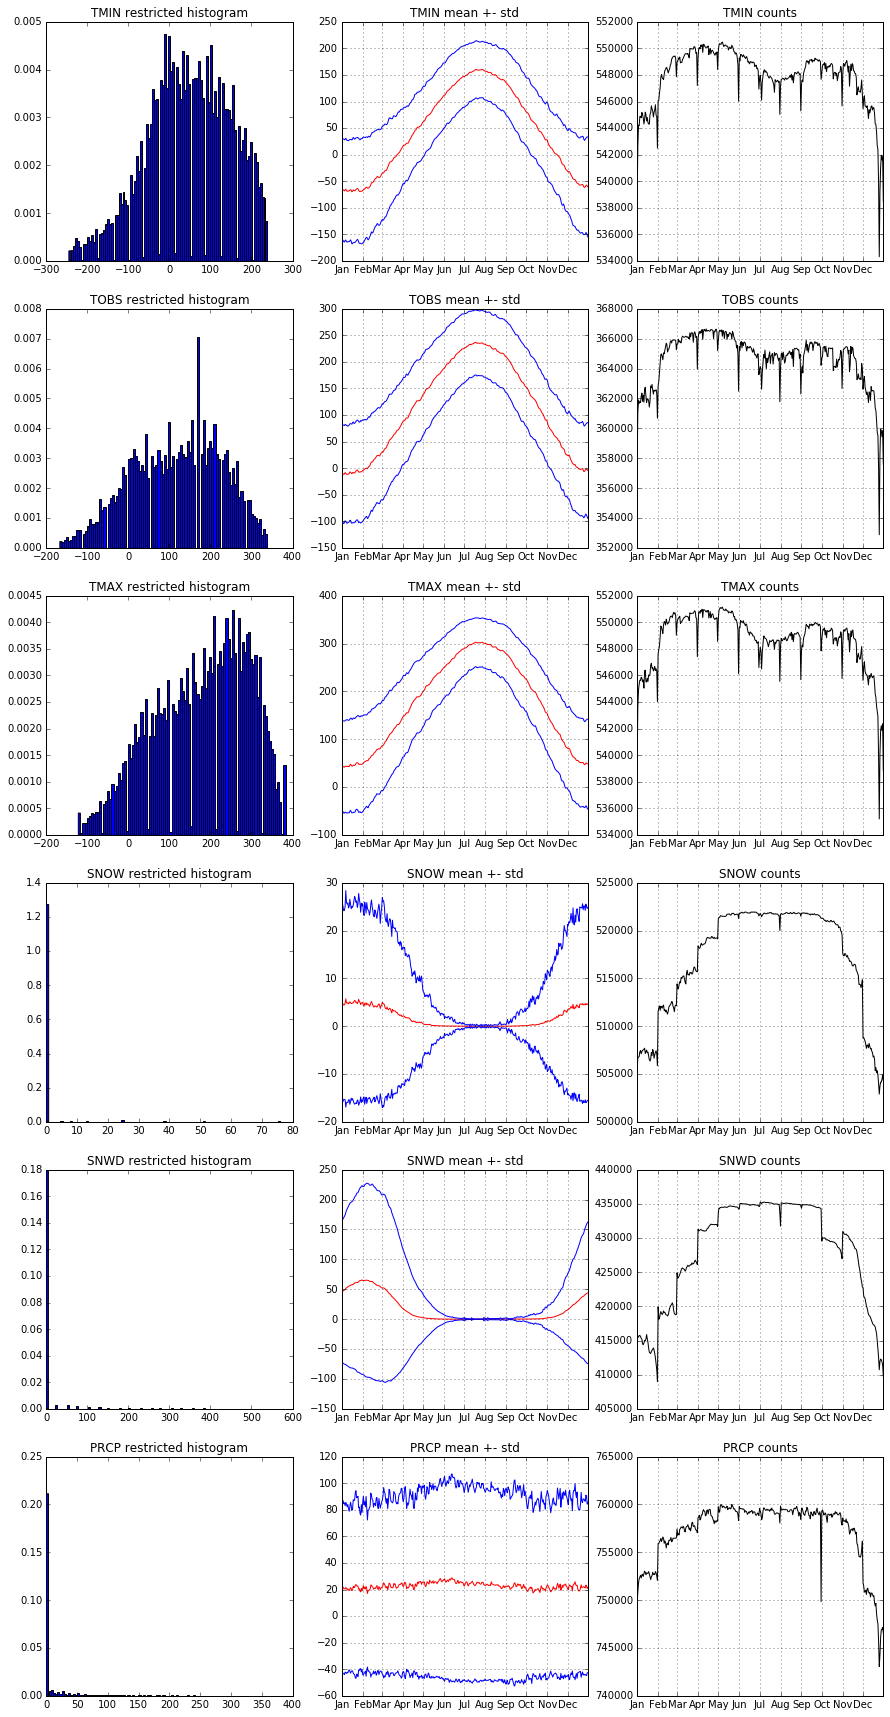

In [8]:
figure(figsize=(15,30))
offset=1
for meas in STAT.keys():
    subplot(6,3,offset)
    offset+=1
    ## Your code for Histogram
    measValues = STAT[meas]["SortedVals"]
    low100 = STAT[meas]["low100"]
    high100 = STAT[meas]["high100"]
    filteredValues = filter(lambda x: x >= low100 and x <= high100, measValues)
    hist(filteredValues, 100, normed=1, facecolor='blue')
    plt.title(meas +" restricted histogram")
    subplot(6,3,offset)
    offset+=1
    ## Your code for mean and mean +- std
    std = STAT[meas]["std"]
    print std
    YearlyPlots(STAT[meas]["Mean"],c="red",ttl=meas +" mean +- std")
    meanPlusStd = []
    meanMinusStd = []
    for i in xrange(len(STAT[meas]["Mean"])):
        mean = STAT[meas]["Mean"][i]
        std = sqrt(STAT[meas]["Var"][i])
        meanPlusStd.append(mean + std)
        meanMinusStd.append(mean - std)
    YearlyPlots(meanPlusStd,c="blue",ttl=meas +" mean +- std")
    YearlyPlots(meanMinusStd,c="blue",ttl=meas +" mean +- std")    
    subplot(6,3,offset)
    offset+=1
    ## Your code for number of measurements
    YearlyPlots(STAT[meas]["NE"],c="black",ttl= meas + " counts")

### Plot the Number of measurements recorded each day for TMAX

In [1]:
## Your code here
YearlyPlots(STAT["TMAX"]["NE"],c="black",ttl="TMAX counts")


NameError: name 'YearlyPlots' is not defined

### Extra Credit
* Can you figure out what is the reason for these lower counts (especially at the beginning and end of the year and also the sudden dip at the end of each month)? Is it restricted to a subset of the stations? Suggest a way to remove this effect.

* Can you Explain the counts per day for "SNWD" ?

Provide your explanation in new markdown cells appended after this cell. Support your explanation
using code cells and graphs. If you need more data that is available only in the full dataset in the cloud but not in the data you have downloaded, contact your TA.


### Extra credit question 1
* Can you figure out what is the reason for these lower counts (especially at the beginning and end of the year and also the sudden dip at the end of each month)? Is it restricted to a subset of the stations? Suggest a way to remove this effect.
1. One of the major reasons is that there could be monthly maintainance in certain set of stations and hence there is a monthly dip. Also, we saw a pattern of 3 month, 6 month maintainance in even more stations than the stations with 1 month maintainance.
2. Yes it is to subset of stations, mostly likely outliers with very less measurements and stations with very high measurements.
3. This could be removed by replacing the Nan or 0 values with average of previous weeks data and it seems to work well in the data set I tried.

without normalization graph


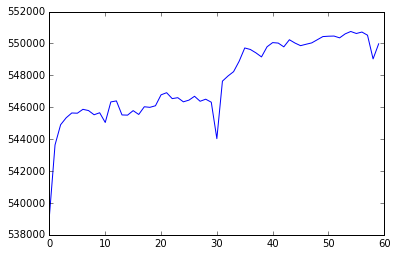

In [13]:
all_stations=pickle.load(open('../../Data/Weather/tmax_all_stations.pickle','r'))
count = 0
total_count = [0]*365
for i in xrange(0,len(all_stations)):
    if True:
        months = [30,57,87,117,147,177,207,237,267,297,327,357]
        for j in months:
            all_stations[i][1][j-2] = all_stations[i][1][j-3]
            all_stations[i][1][j-1] = all_stations[i][1][j-3]
            all_stations[i][1][j] = all_stations[i][1][j-3]
            all_stations[i][1][j+1] = all_stations[i][1][j-3]
            all_stations[i][1][j+2] = all_stations[i][1][j-3]
        for j in xrange(0,365):
            total_count[j] += all_stations[i][1][j]
print "without normalization graph"
plot(STAT["TMAX"]["NE"][0:60])



after normalization graph


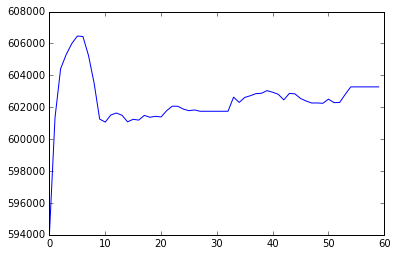

In [14]:
print "after normalization graph"
plot(total_count[0:60])

### Plot the following 3 plots for each measurement:

1. The percentage of variance explained by top-k eigen vectors for k between 1 to 9
2. Plot of mean and mean $\pm$ std
3. Plot of top 3 eigenvectors

Extra credit question 2 --> It is because toward the end of the year it is difficult to measure because of excessive snow
Also some sudden dips are because of maintainance of stations


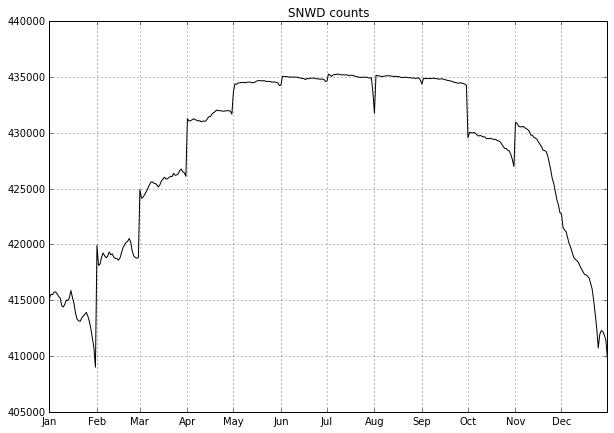

In [18]:
YearlyPlots(STAT["SNWD"]["NE"],c="black",ttl= "SNWD" + " counts")
print "Extra credit question 2 --> It is because toward the end of the year it is difficult to measure because of excessive snow"
print "Also some sudden dips are because of maintainance of stations"

109.933071725
119.25522352
123.742076292
24.1603929954
123.727038785
100.174133773


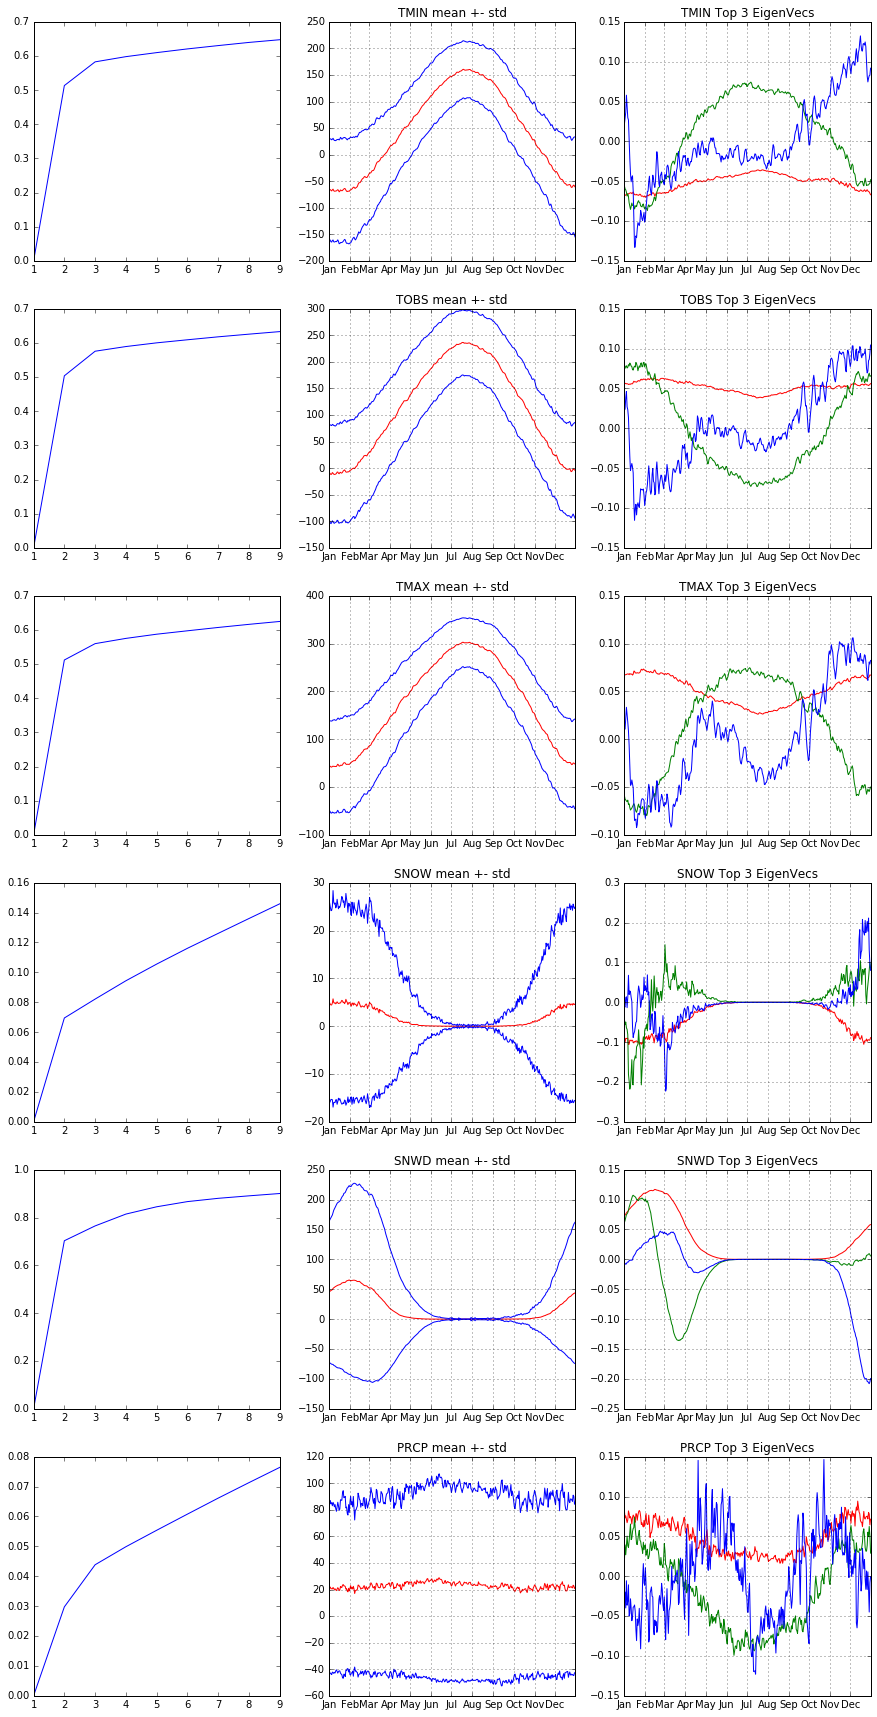

In [88]:
figure(figsize=(15,30))
offset=1
keys = ["TMIN","TOBS","TMAX","SNOW","SNWD","PRCP"]
for meas in keys:
    subplot(6,3,offset)
    offset+=1
    ## Your code for percentage of variance explained
    variancePercentage = []
    totalSum = sum(STAT[meas]["eigval"])
    for i in xrange(0,9):
        currentSum = 0
        for j in xrange(0,i):
            currentSum += STAT[meas]["eigval"][j]
        variancePercentage.append((currentSum * 1.0)/ totalSum)
    plt.plot([i for i in xrange(1,10)], variancePercentage)
            
    subplot(6,3,offset)
    offset+=1
    ## Your code for mean and mean +- std
    std = STAT[meas]["std"]
    print std
    YearlyPlots(STAT[meas]["Mean"],c="red",ttl=meas +" mean +- std")
    meanPlusStd = []
    meanMinusStd = []
    for i in xrange(len(STAT[meas]["Mean"])):
        mean = STAT[meas]["Mean"][i]
        std = sqrt(STAT[meas]["Var"][i])
        meanPlusStd.append(mean + std)
        meanMinusStd.append(mean - std)
    YearlyPlots(meanPlusStd,c="blue",ttl=meas +" mean +- std")
    YearlyPlots(meanMinusStd,c="blue",ttl=meas +" mean +- std") 
    
    subplot(6,3,offset)
    offset+=1
    ## Your code for top-3 eigenvectors
    colors = ["red","green","blue"]
    for i in xrange(0,3):
        eigenVector = STAT[meas]["eigvec"][:, [i]]
        YearlyPlots(eigenVector,c=colors[i],ttl=meas +" Top 3 EigenVecs") 